# Import relevant libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
df = pd.read_csv("average_year_rate_GBP_to_NGN_2001-2020.csv")

In [3]:
#df = df[10:]

In [4]:
df.head()

,rate_year,buying_rate
0,2001,161.940985
1,2002,180.506688
2,2003,209.806118
3,2004,242.630631
4,2005,237.747661


In [5]:
year = df["rate_year"]

# Initial visualisation

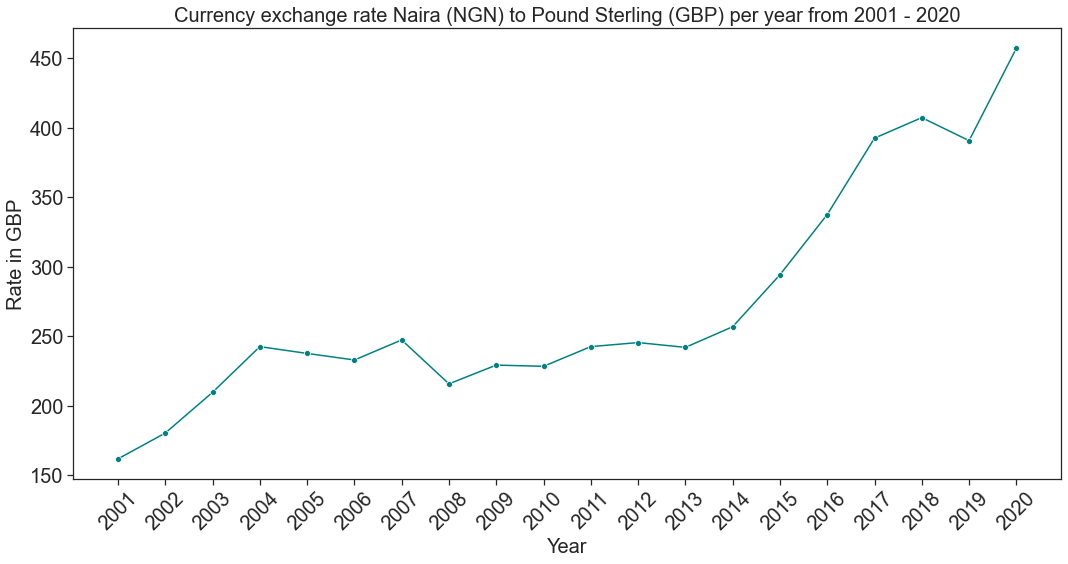

In [6]:
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(data=df, x="rate_year", y="buying_rate", color="teal", marker="o")

plt.title("Currency exchange rate Naira (NGN) to Pound Sterling (GBP) per year from 2001 - 2020", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
#plt.ylim(0,500)
#plt.xlim(2011,2020)
plt.tick_params(labelsize=20) 
plt.tight_layout()

In [7]:
X = df[["rate_year"]]
y = df["buying_rate"]

In [8]:
X.head()

,rate_year
0,2001
1,2002
2,2003
3,2004
4,2005


In [9]:
y.head()

0    161.940985
1    180.506688
2    209.806118
3    242.630631
4    237.747661
Name: buying_rate, dtype: float64

# Let's split the dataset into the training and testing groups


In [10]:
n= int(len(df) * 0.8) 

X_train = X[:n]
y_train = y[:n]

X_test = X[n:]
y_test = y[n:]

#We use the first 80% for training and the final 20% for testing

# Linear regression

In [11]:
from sklearn.linear_model import LinearRegression 

LinReg = LinearRegression()



# Let's fit the linear regression model to the training data 

In [12]:
LinReg.fit(X_train, y_train)

LinearRegression()

# Let's visualise the linear regression on the training set (2001 - 2016)

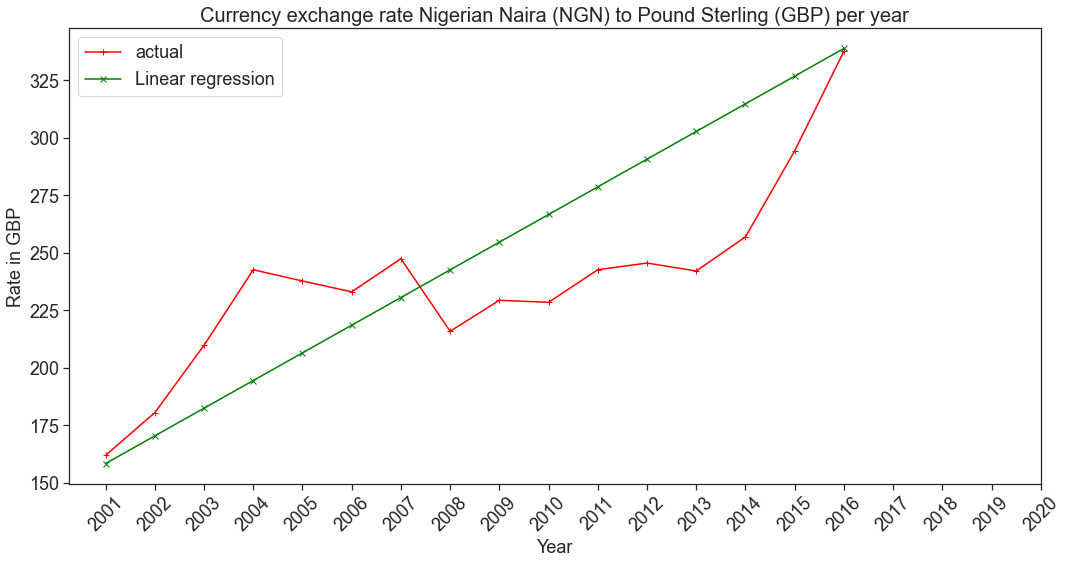

In [42]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X_train, y_train, color="red", marker="+", label="actual")  
plt.plot(X_train,LinReg.predict(X_train), color="green", marker="x", label="Linear regression") 
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

# Predictions with linear regression (test set)

In [14]:
y_predict_lr = LinReg.predict(X_test)

In [15]:
print(y_test)

16    392.530362
17    407.270215
18    390.736814
19    457.157542
Name: buying_rate, dtype: float64


In [16]:
print(y_predict_lr)

[296.47020633 303.36385396 310.2575016  317.15114923]


# Let's evaluate the accuracy of the linear regression model 

In [17]:
from sklearn.metrics import mean_squared_error #to evaluate our accuracy of the model
from math import sqrt #square root

In [18]:
rmse_lr = sqrt(mean_squared_error(y_predict_lr,y_test))
print(rmse_lr)

107.35780756749936


In [19]:
y_test_mean = y_test.mean()

In [20]:
round((rmse_lr/y_test_mean * 100), ndigits=0)

26.0

The rmse should be very significantly smaller than the mean of the test set. 
this means that - On average, our linear regression model predictions are off by about 26%. 

# Let's add polynomial term(s) to the linear regression model

In [21]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree=3)
X_polynom = polynom.fit_transform(X_train) #

In [22]:
#this shows the degrees of the X values until degree^n

X_polynom

array([[1.00000000e+00, 2.00100000e+03, 4.00400100e+06, 8.01200600e+09],
       [1.00000000e+00, 2.00200000e+03, 4.00800400e+06, 8.02402401e+09],
       [1.00000000e+00, 2.00300000e+03, 4.01200900e+06, 8.03605403e+09],
       [1.00000000e+00, 2.00400000e+03, 4.01601600e+06, 8.04809606e+09],
       [1.00000000e+00, 2.00500000e+03, 4.02002500e+06, 8.06015012e+09],
       [1.00000000e+00, 2.00600000e+03, 4.02403600e+06, 8.07221622e+09],
       [1.00000000e+00, 2.00700000e+03, 4.02804900e+06, 8.08429434e+09],
       [1.00000000e+00, 2.00800000e+03, 4.03206400e+06, 8.09638451e+09],
       [1.00000000e+00, 2.00900000e+03, 4.03608100e+06, 8.10848673e+09],
       [1.00000000e+00, 2.01000000e+03, 4.04010000e+06, 8.12060100e+09],
       [1.00000000e+00, 2.01100000e+03, 4.04412100e+06, 8.13272733e+09],
       [1.00000000e+00, 2.01200000e+03, 4.04814400e+06, 8.14486573e+09],
       [1.00000000e+00, 2.01300000e+03, 4.05216900e+06, 8.15701620e+09],
       [1.00000000e+00, 2.01400000e+03, 4.05619600e

In [60]:
X_train

,rate_year
0,2001
1,2002
2,2003
3,2004
4,2005
5,2006
6,2007
7,2008
8,2009
9,2010


# Let's fit the polynomial regression model to the training data 

In [23]:
PolyReg = LinearRegression()
PolyReg.fit(X_polynom, y_train)

LinearRegression()

# Let's visualise the polynomial regression on the training set (2001 - 2016)


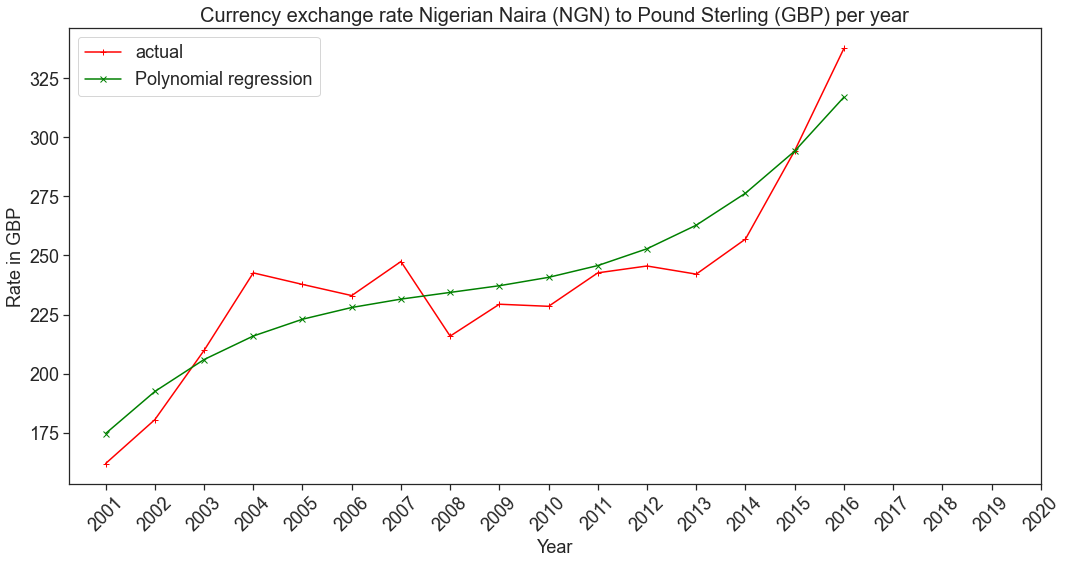

In [59]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X_train, y_train, color="red", marker="+", label="actual")  
plt.plot(X_train,PolyReg.predict(polynom.fit_transform(X_train)), color="green", marker="x", label="Polynomial regression") 
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

# Predictions with polynomial regression (test set)

In [25]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))

In [26]:
y_predict_pr

array([386.28128195, 452.47851706, 534.46910858, 633.86788034])

# Let's evaluate the accuracy of the polynomial regression model 

In [27]:
rmse_pr = sqrt(mean_squared_error(y_predict_pr,y_test))
print(rmse_pr)

116.15545345510752


In [28]:
round((rmse_pr/y_test_mean * 100), ndigits=0)

28.0

The rmse should be very significantly smaller than the mean of the test set. 
this means that - On average, our polynomial regression model predictions are off by about 28%. 

# Let's visualise the models on the full dataset (using model trained on train data)

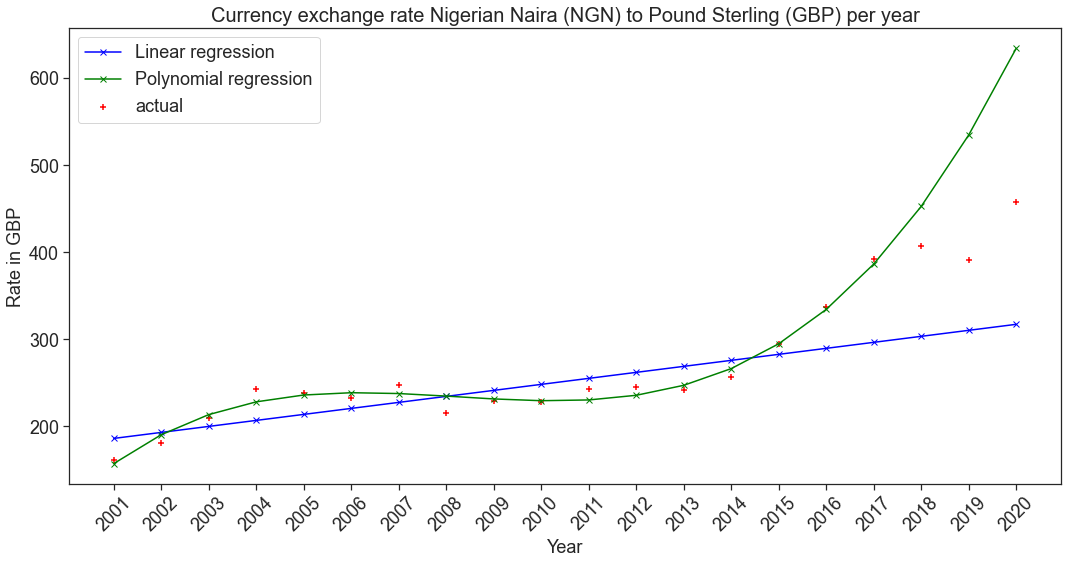

In [30]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X, y, color="red", marker="+", label="actual")  
plt.plot(X,LinReg.predict(X), color="blue", marker="x", label="Linear regression") 
plt.plot(X,PolyReg.predict(polynom.fit_transform(X)), color="green", marker="x", label="Polynomial regression") 
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

# Let's make predictions for the next five years


In [31]:
future_years = pd.DataFrame(np.array([2021,2022,2023,2024,2025]),
                     columns=["rate_year"]
                     )

In [32]:
future_years

,rate_year
0,2021
1,2022
2,2023
3,2024
4,2025


In [44]:
LinReg.predict(future_years)

array([399.03304408, 411.0662761 , 423.09950812, 435.13274014,
       447.16597216])

In [45]:
PolyReg.predict(polynom.fit_transform(future_years))

array([530.93640101, 598.68794477, 676.42464375, 764.85958183,
       864.70584357])

# Further exercise (using model trained on full dataset before making the 5-year prediction)

In [48]:
LinReg.fit(X, y)

LinearRegression()

In [49]:
PolyReg.fit(polynom.fit_transform(X), y)

LinearRegression()

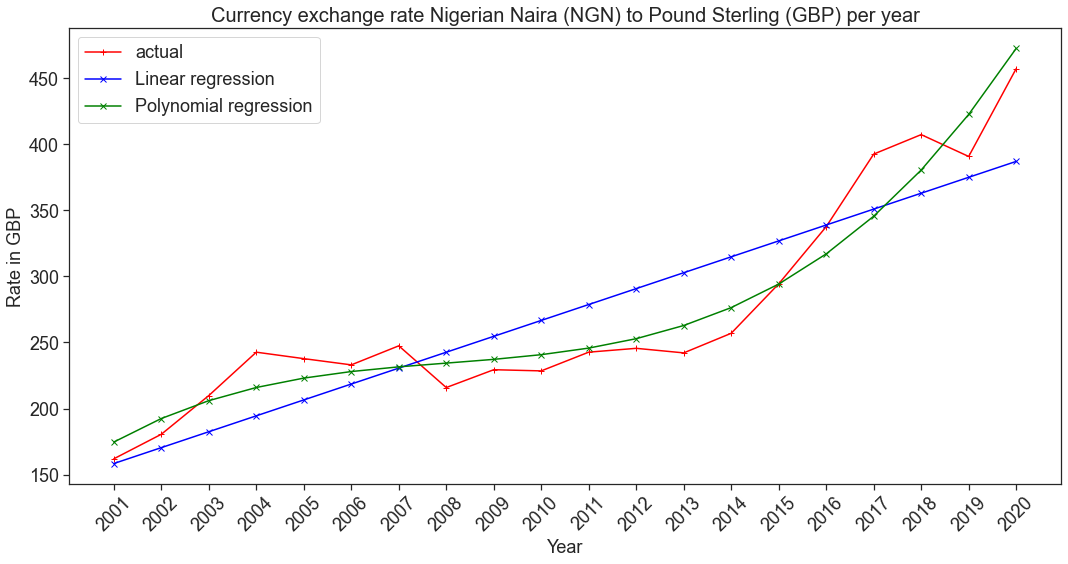

In [50]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X, y, color="red", marker="+", label="actual")  
plt.plot(X,LinReg.predict(X), color="blue", marker="x", label="Linear regression") 
plt.plot(X,PolyReg.predict(polynom.fit_transform(X)), color="green", marker="x", label="Polynomial regression") 
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

In [51]:
LinReg.predict(future_years)

array([399.03304408, 411.0662761 , 423.09950812, 435.13274014,
       447.16597216])

In [52]:
PolyReg.predict(polynom.fit_transform(future_years))

array([530.93640101, 598.68794477, 676.42464375, 764.85958183,
       864.70584357])

In [58]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(LinReg, X, y,
                              cv=5,
                              scoring="neg_mean_squared_error")

print("Average RMSE score:", sqrt(scores.mean()))

Average RMSE score: 64.11356073211459


In [57]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(PolyReg, X, y,
                              cv=5,
                              scoring="neg_mean_squared_error")

print("Average RMSE score:", sqrt(scores.mean()))

Average RMSE score: 64.11356073211459


# Further Excercise - Random Forest (Test)

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
from sklearn.model_selection import train_test_split

In [64]:
X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
rdm = RandomForestRegressor()

In [67]:
rdm.fit(X_train_rd, y_train_rd)

RandomForestRegressor()

In [69]:
y_pred_rd = rdm.predict(X_test_rd)

In [70]:
print(y_test_rd)
print(y_pred_rd)

18    390.736814
1     180.506688
19    457.157542
8     229.366047
Name: buying_rate, dtype: float64
[391.71548168 183.11619986 391.71548168 221.18517512]


In [71]:
rmse_rd = sqrt(mean_squared_error(y_pred_rd,y_test_rd))
print(rmse_rd)

33.00514097992651


In [72]:
y_test_rd.mean()

314.4417728989813

In [73]:
round((rmse_rd/y_test_rd.mean() * 100), ndigits=0)

10.0

In [74]:
prediction_rd = rdm.predict(X)
print(prediction_rd)

[183.11619986 183.11619986 215.04962336 234.19679077 238.09927345
 236.3457253  240.83726523 224.25661264 221.18517512 230.96024449
 239.93805112 244.31433083 244.65599541 259.01146639 285.66883582
 330.50020953 374.3788539  391.71548168 391.71548168 391.71548168]


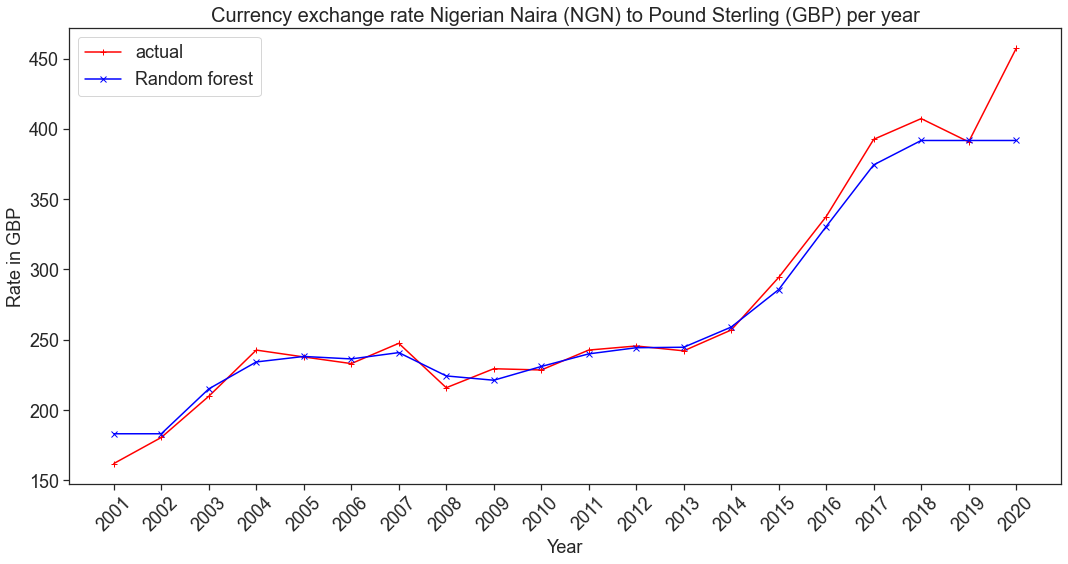

In [77]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X, y, color="red", marker="+", label="actual")  
plt.plot(X,prediction_rd, color="blue", marker="x", label="Random forest")
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

# Major Issue - random forest did not predict out of range values 

In [80]:
rdm.predict(future_years)

array([391.71548168, 391.71548168, 391.71548168, 391.71548168,
       391.71548168])